In [2]:
# importing wanted libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data 

data = pd.read_csv(r"C:\Users\VIPIN\Desktop\DSA_ICTAK\ASSIGNMENT\ASSIGNMENT.3\StudentsPerformance.csv")

In [5]:
# first 20 rows of data

data.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
5,female,group B,high school,free/reduced,completed,23,44,36
6,female,group B,some high school,free/reduced,none,24,38,27
7,female,group D,associate's degree,free/reduced,none,26,31,38
8,female,group D,some high school,free/reduced,none,19,34,32
9,female,group C,high school,standard,none,29,29,30


In [6]:
# rows and columns

data.shape

(1000, 8)

In [7]:
# information of data

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
# Description of dataset

data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [34]:
# find null value, here 0 null values

data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [35]:
# unique values for each column

data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     85
reading score                  72
writing score                  77
dtype: int64

In [40]:
#  measures the asymmetry of the distribution

print(data['math score'].skew())
print(data['reading score'].skew())
print(data['writing score'].skew())


-0.40117390503900024
-0.2883616397714267
-0.3015107763930539


In [9]:
data['math score'].mean()

66.001

In [108]:
data['reading score'].median()

70.0

In [109]:
data['writing score'].mode()

0    74
Name: writing score, dtype: int64

In [15]:
import statistics as stat

In [16]:
stat.mean(data['math score'])

66.001

In [17]:
stat.variance(data['math score'])

242.4114104104104

In [18]:
stat.stdev(data['math score'])

15.569566802272002

# 1. Find out how many males and females participated in the test.

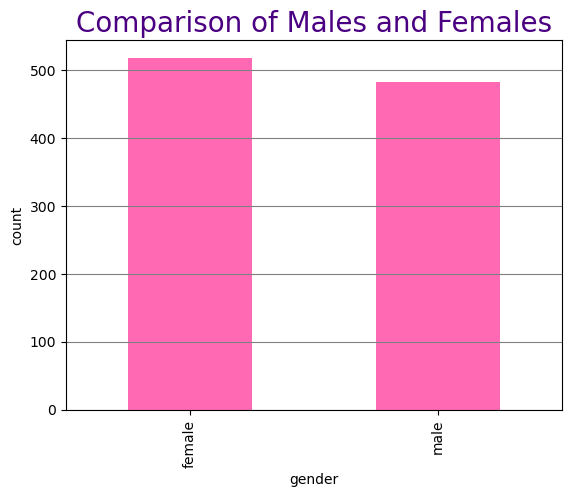

In [50]:
data['gender'].value_counts(normalize = True)
data['gender'].value_counts(dropna = False).plot.bar(color = 'hotpink', )
plt.title('Comparison of Males and Females', size = 20, color='indigo')
plt.xlabel('gender')
plt.ylabel('count')
plt.grid(color='gray', axis='y')
plt.show()

By comparing the count of males and females based on the height of the bars, count of female is more than male. By using value_counts() method we can find out exact number for female and male separately.

In [19]:
print("Number of Male participated in the test = ",data['gender'].value_counts()['male'])
print("Number of Female participated in the test = ",data['gender'].value_counts()['female'])

Number of Male participated in the test =  482
Number of Female participated in the test =  518


Prints the number of males and females who participated in the test based on the 'gender' column in the data dataframe. value_counts() counts the occurrences of each unique value in the 'gender' column.

# 2. What do you think about the students' parental level of education?

In [62]:
# there are 6 categories for parental level of education

data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
pass_math                      2
dtype: int64

In [63]:
# the 6 different categories are:

print("Categories in parent level education: ")
print(data['parental level of education'].unique())

Categories in parent level education: 
["bachelor's degree" 'some college' "associate's degree" 'high school'
 'some high school' "master's degree"]


In [64]:
# count of students for 6 different categories:

data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

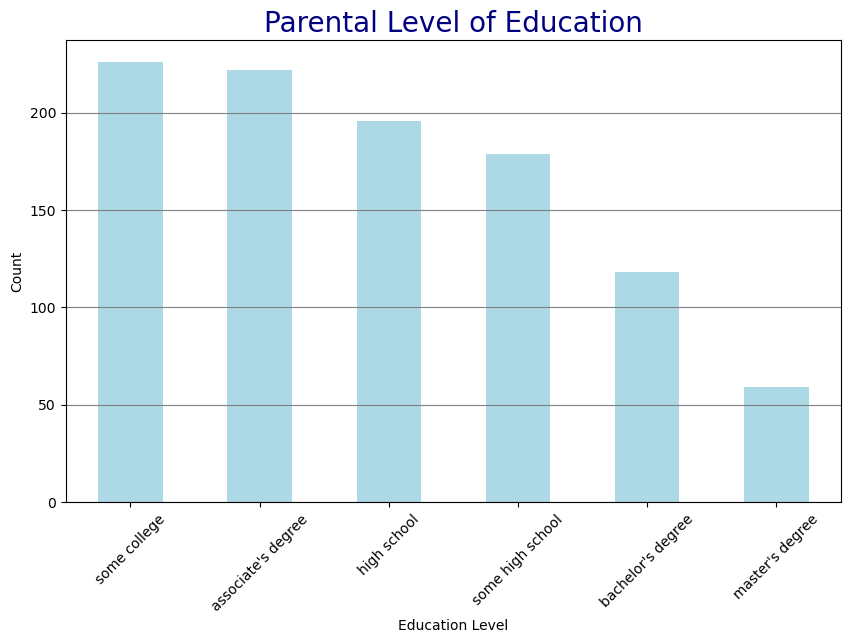

In [51]:
parent_education_counts = data['parental level of education'].value_counts()
plt.figure(figsize=(10, 6))
parent_education_counts.plot.bar(color='lightblue')
plt.title("Parental Level of Education", size=20, color='navy')
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(color='gray', axis='y')
plt.show()

Among 1000 students, 226 student's parents have 'some college', 222 have 'associate's degree',196 have 'high school' background, 179 have 'some high school' background, 118 have 'bachelor's degree',59 have 'master's degree' background.
Means, most of the students parents are with 'some college' and parents with 'masters degree' is the least.  
From this plot we can identify student's families educational background and also is there relation between parent education and students performance.

In [54]:
# group the data based on the 'parental level of education' 
grouped_data = data.groupby('parental level of education')

In [65]:
# Calculate descriptive statistics: 

print("   ")
print("Descriptive Data of math score")
grouped_data['math score'].describe()

   
Descriptive Data of math score


,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,67.977477,15.108190,26.0,57.00,67.0,80.0,100.0
bachelor's degree,118.0,69.288136,15.164117,29.0,61.00,68.0,79.0,100.0
high school,196.0,61.821429,15.160466,8.0,53.75,63.0,72.0,99.0
master's degree,59.0,70.254237,14.843544,40.0,57.00,73.0,81.0,95.0
some college,226.0,67.128319,14.871790,11.0,59.00,68.0,76.0,100.0
some high school,179.0,63.134078,16.602894,0.0,53.00,65.0,74.0,97.0


In [66]:
print("   ")
print("Descriptive Data of reading score")
grouped_data['reading score'].describe()

   
Descriptive Data of reading score


,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,71.018018,13.842999,31.0,61.0,73.0,81.00,100.0
bachelor's degree,118.0,73.000000,14.285250,41.0,63.0,73.0,82.75,100.0
high school,196.0,64.602041,14.245280,24.0,54.0,66.0,74.25,99.0
master's degree,59.0,75.949153,13.046896,53.0,66.5,76.0,84.50,100.0
some college,226.0,69.566372,14.312932,23.0,60.0,71.0,80.00,100.0
some high school,179.0,66.759777,15.710633,17.0,56.5,67.0,79.00,100.0


In [60]:
print("   ")
print("Descriptive Data of writing score")
grouped_data['writing score'].describe()

   
Descriptive Data of writing score


,count,mean,std,min,25%,50%,75%,max
parental level of education,,,,,,,,
associate's degree,222.0,70.031532,14.260787,35.0,58.25,71.5,80.0,100.0
bachelor's degree,118.0,73.381356,14.728262,38.0,62.50,74.0,83.0,100.0
high school,196.0,62.403061,14.165172,15.0,52.00,64.0,73.0,100.0
master's degree,59.0,75.677966,13.730711,46.0,67.00,75.0,85.0,100.0
some college,226.0,69.035398,15.089911,19.0,60.00,70.0,79.0,99.0
some high school,179.0,64.888268,15.736197,10.0,54.00,66.0,77.0,100.0


Insights:

Count: This indicates the number of students in each parental level of education.

Mean: It represents the average score for math, reading and writing corresponding to each parental education level.
Higher mean score is scored by master's degree which means, their students achieve better performance.

Standard Deviation: This shows the dispersion of math, reading and writing scores within each parental education level group.
A low std dev indicates, marks scored for math, reading and writing are close to mean.
which indicates, masters degree are having less std dev, i.e, marks are tightly clustered around the mean.

Minimum and Maximum: These values give the range of scores observed in each parental education level category.
here, masters degree have good range of score having greater minimum score compared to others.

Quartiles (25%, 50%, 75%): These values help understand the distribution of scores within each education level group.
masters degree having good score for 25%, 50%, and 75%.

# 3. Who scores the most on average for math, reading and writing based on
### ● Gender
### ● Test preparation course

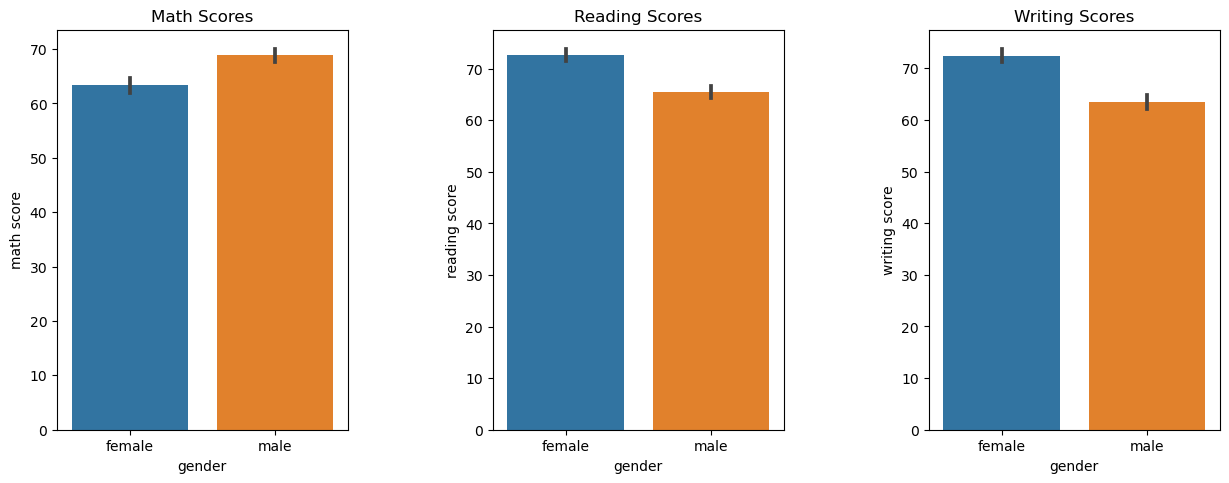

In [45]:
plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(x="gender", y="math score", data=data)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(x="gender", y="reading score", data=data)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(x="gender", y="writing score", data=data)
plt.show()

Females tend to score higher in reading and writing, while males tend to score higher in math. By using groupby and mean function we can find out exact mean for both female and male.

In [74]:
data.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
gender,,,
female,63.376448,72.590734,72.467181
male,68.821577,65.545643,63.446058


Females have higher score in reading (72.6) and writing (72.5), while males have higher in math(68.8).

In [41]:
# no of students who have completed the test prep course and those who not completed.

data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

less no of students have completed the test preparation course.

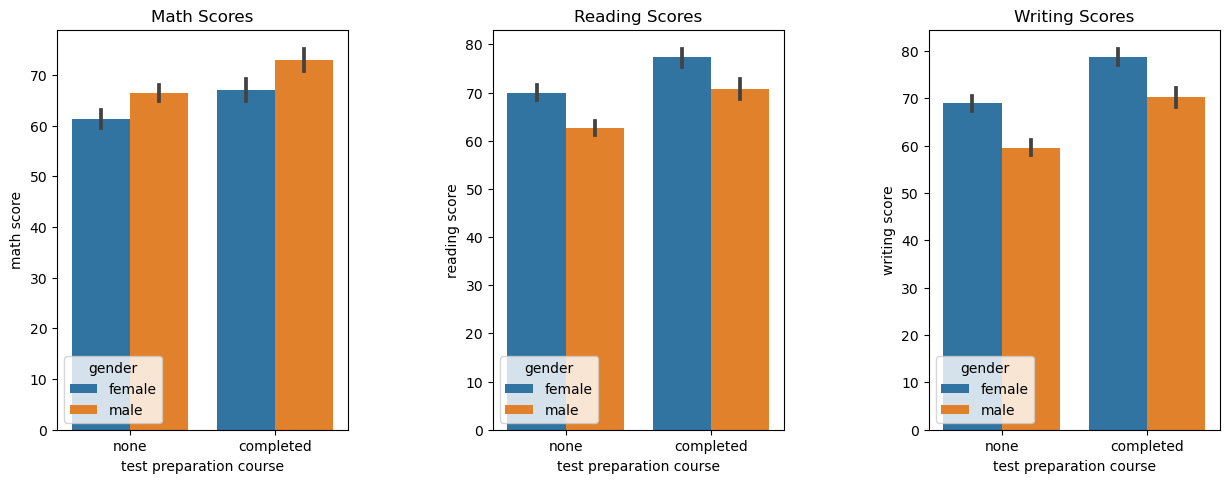

In [47]:
# genderwise plot of those who completed the test prep course and those who not.

plt.figure(figsize=(15,5))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
plt.subplot(131)
plt.title('Math Scores')
sns.barplot(hue="gender", y="math score", x="test preparation course", data=data)
plt.subplot(132)
plt.title('Reading Scores')
sns.barplot(hue="gender", y="reading score", x="test preparation course", data=data)
plt.subplot(133)
plt.title('Writing Scores')
sns.barplot(hue="gender", y="writing score", x="test preparation course", data=data)
plt.show()

In [75]:
data.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.96648,74.175978,74.684358
none,63.78972,66.417445,64.457944


From these insights, it appears that completing the test preparation course is associated with higher average scores in math, reading, and writing. This suggests that the test preparation course may have a positive impact on students' academic performance.

# 4. What do you think about the scoring variation for math, reading and writing based on
### ● Gender
### ● Test preparation course

The average math score for males is 68.82, while for females it is 63.38.
This indicates that, on average, males tend to score higher in math compared to females.

The average reading and writing score for males is 65.55 and 63.45respectively, while for females it is 72.59 and 72.47.
This indicates that, on average, males tend to score lesser in reading and writing compared to females.

In [76]:
data.groupby('gender')[['math score', 'reading score', 'writing score']].std()

,math score,reading score,writing score
gender,,,
female,16.029928,14.411018,14.844842
male,14.556411,14.149594,14.227225


Higher standard deviation for female math scores suggests a greater variation in scores compared to male math scores.

Similar standard deviations for both genders in reading and writing score.

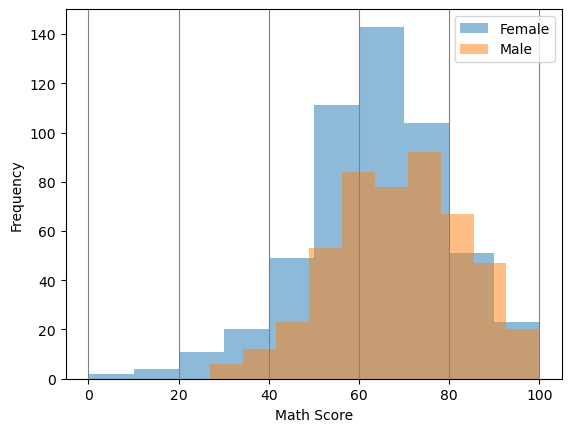

In [79]:
plt.hist(data[data['gender'] == 'female']['math score'], bins=10, alpha=0.5, label='Female')
plt.hist(data[data['gender'] == 'male']['math score'], bins=10, alpha=0.5, label='Male')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.grid(color='gray', axis='x')
plt.legend()
plt.show()

for female, the highest frequency is in range between 60 to 70 and left skewed.
whereas in male, the highest frequency is in range between 65 to 75 and moderately skewed.

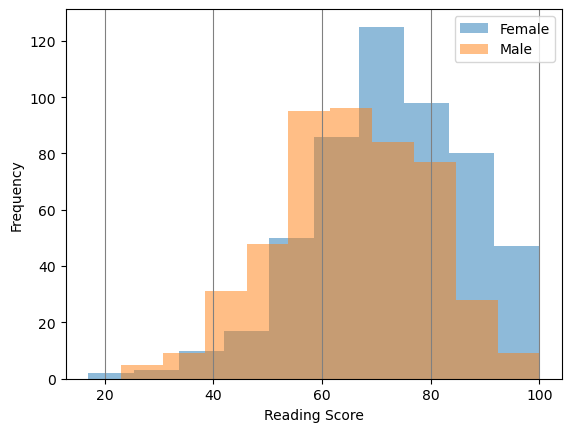

In [80]:
plt.hist(data[data['gender'] == 'female']['reading score'], bins=10, alpha=0.5, label='Female')
plt.hist(data[data['gender'] == 'male']['reading score'], bins=10, alpha=0.5, label='Male')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.grid(color='gray', axis='x')
plt.legend()
plt.show()

for female, the highest frequency is in range between 70 to 80 and relatively symmetrical.
whereas in male, the highest frequency is in range between 60 to 70 and left skewed.

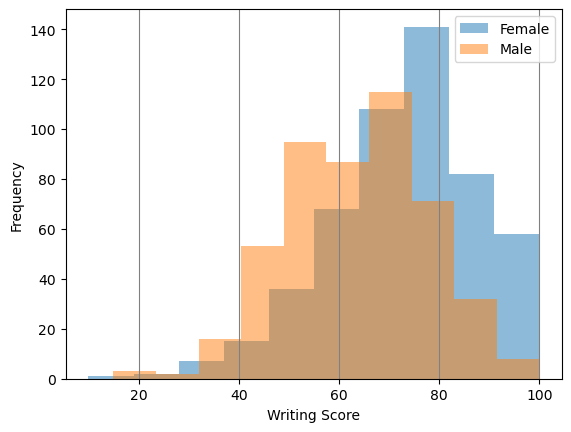

In [81]:
plt.hist(data[data['gender'] == 'female']['writing score'], bins=10, alpha=0.5, label='Female')
plt.hist(data[data['gender'] == 'male']['writing score'], bins=10, alpha=0.5, label='Male')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.grid(color='gray', axis='x')
plt.legend()
plt.show()

for female, the highest frequency is in range between 70 to 80 and relatively symmetrical. whereas in male, the highest frequency is in range between 60 to 70 and left skewed.

Male students scored higher in Maths where as female students scored higher in Reading and writing.
Both Students male and female who completed the test preparation course scored higher in all three subjects.

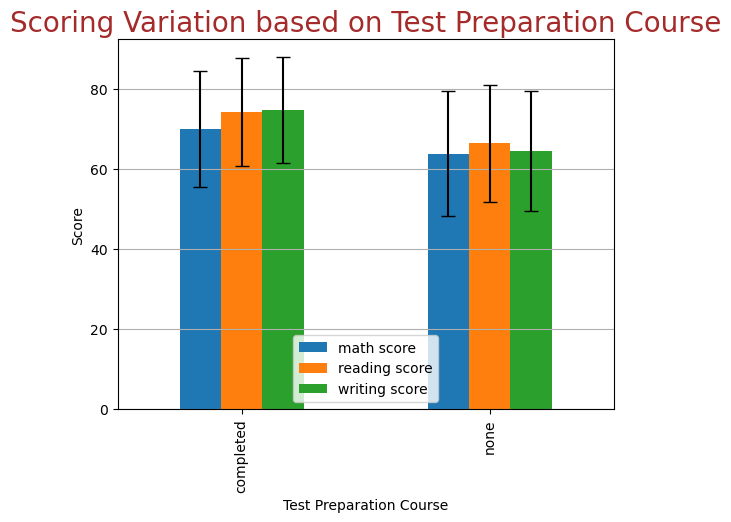

In [84]:
# Group the data 
grouped_data = data.groupby('test preparation course')

# Calculate the mean scores for math, reading, and writing
mean_scores = grouped_data[['math score', 'reading score', 'writing score']].mean()

# Calculate the standard deviations for math, reading, and writing
std_scores = grouped_data[['math score', 'reading score', 'writing score']].std()

# Plot the mean scores with error bars representing the standard deviations
mean_scores.plot(kind='bar', yerr=std_scores, capsize=5)
plt.title('Scoring Variation based on Test Preparation Course', size=20, color='brown')
plt.xlabel('Test Preparation Course')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid(axis='y')
plt.show()


Height of the bar indicates the average score.
Those who completed test preparation course gained maximum score for all three subjects where as who not completed test preparation course gained less score. 

# 5. The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

In [85]:
data_sorted = data.sort_values('math score', ascending=False)

In [90]:
math_score_25th_percentile = data_sorted['math score'].quantile(0.25)
math_score_75th_percentile = data_sorted['math score'].quantile(0.75)
math_score_50th_percentile = data_sorted['math score'].quantile(0.50)

In [88]:
math_score_75th_percentile

77.0

In [94]:
math_score_50th_percentile

66.0

In [95]:
math_score_25th_percentile

57.0

In [92]:
top_75_percent = data_sorted[data_sorted['math score'] >= math_score_75th_percentile]

In [96]:
top_75_percent

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,bonus,math_score_75th_percentile
999,male,group E,bachelor's degree,standard,completed,100,100,100,Pass,10,77.0
515,female,group E,some college,standard,none,100,92,97,Pass,10,77.0
517,female,group E,associate's degree,standard,none,100,100,100,Pass,10,77.0
516,female,group E,bachelor's degree,standard,none,100,100,100,Pass,10,77.0
997,male,group D,some college,standard,completed,100,97,99,Pass,10,77.0
...,...,...,...,...,...,...,...,...,...,...,...
427,female,group D,associate's degree,standard,none,77,77,73,Pass,10,77.0
426,female,group D,some college,standard,none,77,68,77,Pass,10,77.0
417,female,group B,master's degree,standard,none,77,90,84,Pass,10,77.0
424,female,group D,associate's degree,free/reduced,completed,77,89,98,Pass,10,77.0


In [98]:
math_score_25th_percentile = data['math score'].quantile(0.25)
math_score_25th_percentile

57.0

In [29]:
math_score_75th_percentile = data['math score'].quantile(0.75)
math_score_75th_percentile

77.0

In [99]:
bonus_threshold = math_score_75th_percentile + 0.05 * math_score_75th_percentile

In [100]:
data['bonus'] = 0

In [101]:
data.loc[data['math score'] >= bonus_threshold, 'bonus'] = 10

In [102]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,bonus,math_score_75th_percentile
999,male,group E,bachelor's degree,standard,completed,100,100,100,Pass,10,77.0
996,male,group A,some college,standard,completed,100,96,86,Pass,10,77.0
515,female,group E,some college,standard,none,100,92,97,Pass,10,77.0
517,female,group E,associate's degree,standard,none,100,100,100,Pass,10,77.0
516,female,group E,bachelor's degree,standard,none,100,100,100,Pass,10,77.0
997,male,group D,some college,standard,completed,100,97,99,Pass,10,77.0
998,male,group E,associate's degree,free/reduced,completed,100,100,93,Pass,10,77.0
995,male,group E,some college,standard,completed,99,87,81,Pass,10,77.0
513,female,group E,bachelor's degree,standard,completed,99,100,100,Pass,10,77.0
514,female,group E,high school,standard,none,99,93,90,Pass,10,77.0


In [104]:
print(data['bonus'].unique())

[10  0]


In [105]:
data['bonus'].value_counts()[10]

177

In [106]:
data['bonus'].value_counts()[0]

823

insights:

Among 1000 students, 177 students are eligible for bonus point, say 10.
